In [223]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
result_df = pd.read_csv("expe_results_formatted.csv",sep=";")

In [224]:
res={}

for column in result_df:
    if "Q" in column:

        break
    res[column+"_ok"]=[]
    for line in result_df[column]:

        if (aux:=ast.literal_eval(line))[1] == "ok" and aux[0]!= None:
            res[column+"_ok"].append(aux[0])
    if len(res[column+"_ok"]) == 0:
        res.pop(column+"_ok")
res

{'R1_P_ok': [33.2, 40.61, 118.28],
 'R1_POC_ok': [14.2, 19.44, 50.7, 33.92, 26.12, 52.57, 22.4, 11.72],
 'R2_P_ok': [118.1, 55.92, 5.73, 250.21, 74.07, 226.5, 42.74],
 'R2_POC_ok': [21.1,
  22.29,
  24.64,
  26.81,
  19.75,
  10.74,
  28.64,
  11.08,
  30.72,
  11.72],
 'R3_A_ok': [23.29,
  22.94,
  30.39,
  22.15,
  27.46,
  26.52,
  35.17,
  56.8,
  19.43,
  39.16],
 'R3_POC_ok': [33.77, 36.15, 34.77, 43.79, 55.02, 34.85, 40.39, 66.95],
 'R4_A_ok': [16.66,
  23.45,
  17.2,
  30.4,
  26.52,
  32.03,
  20.09,
  24.69,
  24.4,
  19.71,
  23.11],
 'R4_O_ok': [28.6, 9.2, 4.99, 29.48],
 'R4_POC_ok': [25.28,
  21.48,
  26.12,
  24.66,
  22.72,
  19.56,
  17.55,
  21.22,
  40.39,
  26.27,
  22.43],
 'R5_P_ok': [29.49, 35.58, 63.41, 17.3, 34.22, 59.3],
 'R5_POC_ok': [11.11,
  18.23,
  8.21,
  29.27,
  17.6,
  11.85,
  17.55,
  15.98,
  15.0,
  10.78,
  21.47],
 'R6_POC_ok': [14.26,
  23.84,
  20.02,
  18.37,
  20.36,
  24.02,
  8.52,
  18.97,
  21.99,
  23.49,
  14.03],
 'R7_P_ok': [12.61, 12

/tmp/ipykernel_66804/121989769.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


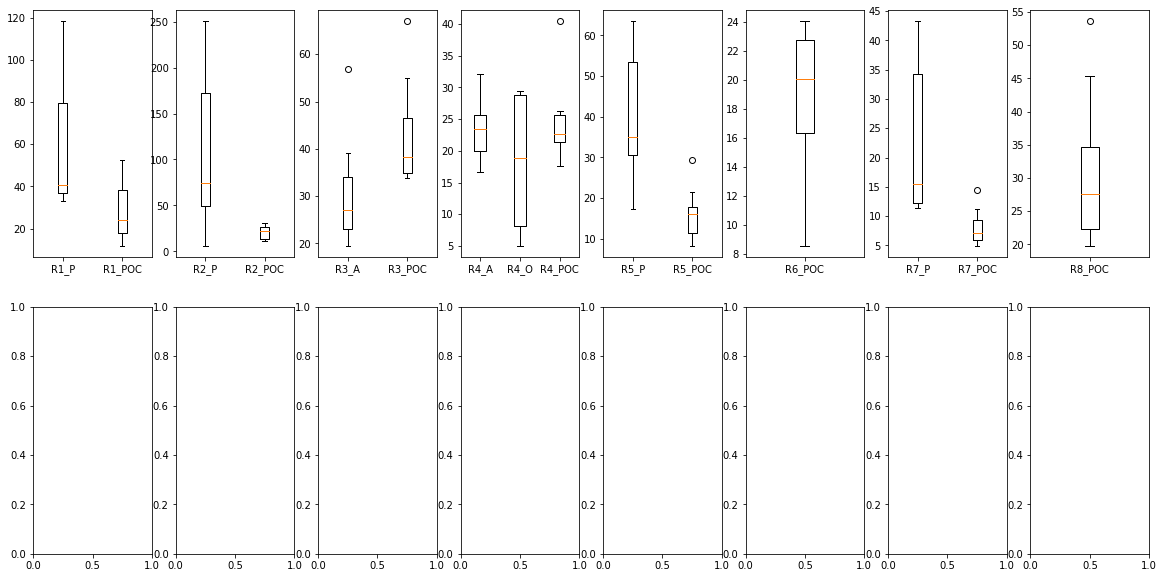

In [231]:
fig, axs = plt.subplots(2, 8, figsize=(20,10))

for i in range(1,9):
    list_of_key_in_requst = []
    data_list = []
    for key in res :
        if "R"+str(i) in key:
            list_of_key_in_requst.append(key.replace("_ok",""))
            data_list.append(res[key])
    axs[0,i-1].boxplot(data_list, labels=list_of_key_in_requst)
fig.show()
fig.savefig("boxplot.pdf", format="pdf")


In [226]:
print(pd.DataFrame(res["R2_P_ok"]).mean())
print(pd.DataFrame(res["R2_POC_ok"]).mean())
print(pd.DataFrame(res["R2_P_ok"]).mean()/pd.DataFrame(res["R2_POC_ok"]).mean())


0    110.467143
dtype: float64
0    20.749
dtype: float64
0    5.323974
dtype: float64


In [227]:
print(pd.DataFrame(res["R3_A_ok"]).mean())
print(pd.DataFrame(res["R3_POC_ok"]).mean())
print(pd.DataFrame(res["R3_POC_ok"]).mean()/pd.DataFrame(res["R3_A_ok"]).mean())

0    30.331
dtype: float64
0    43.21125
dtype: float64
0    1.424656
dtype: float64


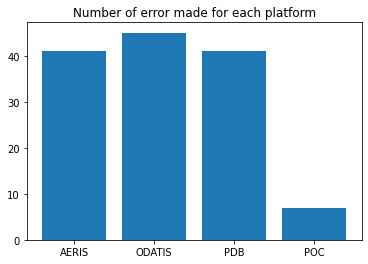

In [228]:
res_error={"AERIS":0,"ODATIS":0,"PDB":0,"POC":0}

for column in result_df:
    if "Q" in column:
        break
    for line in result_df[column]:
        if (aux:=ast.literal_eval(line))[1] == "error":
            if "A" in column:
                res_error["AERIS"]+=1
            if "O" in column:
                res_error["ODATIS"]+=1
            if "P" in column:
                res_error["PDB"]+=1
            if "POC" in column:
                res_error["POC"]+=1
plt.bar(res_error.keys(),height=res_error.values())
plt.title("Number of error made for each platform")
plt.savefig("bar_chart_error.pdf", format="pdf")

In [229]:
res_error={"AERIS":[],"ODATIS":[],"PDB":[],"POC":[]}

for column in result_df:
    if "Q" in column:
        break
    for line in result_df[column]:
        if (aux:=ast.literal_eval(line))[1] == "ok" and aux[0] is not None:
            if "A" in column:
                res_error["AERIS"].append(aux[0])
            if "O" in column:
                res_error["ODATIS"].append(aux[0])
            if "P" in column:
                res_error["PDB"].append(aux[0])
            if "POC" in column:
                res_error["POC"].append(aux[0])
for i in res_error:
    print(i + " mean = " + str(np.mean(res_error[i])))

AERIS mean = 26.741428571428568
ODATIS mean = 22.73070588235294
PDB mean = 31.086019417475725
POC mean = 22.960987654320988


In [230]:
res_error={"AERIS":[],"ODATIS":[],"PDB":[],"POC":[]}

for column in result_df:
    if "Q" in column:
        break
    for line in result_df[column]:
        if (aux:=ast.literal_eval(line))[0] is not None:
            if "A" in column:
                res_error["AERIS"].append(aux[0])
            if "O" in column:
                res_error["ODATIS"].append(aux[0])
            if "P" in column:
                res_error["PDB"].append(aux[0])
            if "POC" in column:
                res_error["POC"].append(aux[0])
for i in res_error:
    print(i + " mean with error = " + str(np.mean(res_error[i])))

AERIS mean with error = 27.84587301587301
ODATIS mean with error = 21.67444444444444
PDB mean with error = 34.319208633093524
POC mean with error = 22.926363636363636
